### This tutorial involves predicting the digits using the MNIST Dataset (one of the beginners competitions in kaggle) using CNN. Trying this nuance approach got me around #800 rank


In [1]:
#importing the necessary libraries
import keras
from keras.layers import Conv2D, Dense, Dropout, Activation, Flatten, MaxPooling2D, Add, AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, BatchNormalization
from keras.metrics import categorical_crossentropy,  sparse_categorical_accuracy
from keras import models
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.activations import relu, sigmoid, tanh
from keras.optimizers import Adam, Adadelta, RMSprop
from keras.models import Sequential
from sklearn.metrics import accuracy_score as accuracy
from keras.datasets import mnist

Using TensorFlow backend.


In [61]:

j = 28                                #---> pixel count
file_csv = pd.read_csv("train.csv")
test_csv = pd.read_csv("test.csv")

imgs = []
test_imgs = []

#importing the images into the numpy array format
for i in range(file_csv.shape[0]):
    imgs.append((file_csv.iloc[i,1:(j*j)+1]).as_matrix())

for i in range(test_csv.shape[0]):
    test_imgs.append((test_csv.iloc[i,0:(j*j)]).as_matrix())

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### since we are going to use a CNN2D based approach all the input vectors should be 3-dimentional 

### It is a good practise to normalize the data before feeding into a gradient based learning algorithm

In [62]:
imgs = np.array(imgs, dtype="float32").reshape(file_csv.shape[0],j,j,1)
test_imgs = np.array(test_imgs, dtype = "float32").reshape(test_csv.shape[0],j,j,1)
imgs = imgs/255
imgs = np.round(imgs)

#normalizing the pixels values (test images)
test_imgs = test_imgs/255
test_imgs = np.round(test_imgs)
print("imgs shape : ", imgs.shape)
print(test_imgs)

#the training data given has the labels along with it 
lab = (file_csv.iloc[:,0].values)
lab = np.array(lab).reshape(lab.shape[0],1)
print(lab)

In [125]:
#training my model on all the training set (trick for better accuracy)

x_train, x_test, y_train, y_test = tts(imgs, lab, test_size = 0.2)

(x_train_m, y_train_m), (x_test_m, y_test_m) = mnist.load_data()

x_train_m = np.concatenate([x_train_m , x_test_m])
y_train_m = np.concatenate([y_train_m, y_test_m])

#normalizing the pixel values for train images
x_train_m = x_train_m.reshape(x_train_m.shape[0], j, j, 1)
x_train_m = x_train_m/255
x_train_m = np.round(x_train_m)


In [126]:
#Building a basic Convolutional model

model = Sequential()
model.add(Conv2D(32, kernel_size = (3), input_shape = (28,28,1), activation = "relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size = (3), activation = "relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size = (3), activation = "relu", padding = "same", strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size = (3), activation = "relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3), activation = "relu"))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3), activation = "relu", padding = "same"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size = (3), activation = "relu"))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = (3), activation = "relu", padding = "same"))
model.add(BatchNormalization())

model.add(Dropout(0.4))

model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))

model.add(Flatten())

model.add(Dense(10, activation = "sigmoid"))

model.compile(Adam(0.0002), metrics = ["accuracy"], loss = "sparse_categorical_crossentropy")

In [127]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_85 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_86 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 12, 12, 32)        9248      
_________________________________________________________________
batch_normalization_87 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_66 (Dropout)         (None, 12, 12, 32)        0         
__________

(33600, 1)
Train on 52500 samples, validate on 17500 samples
Epoch 1/25
 - 18s - loss: 0.6634 - acc: 0.7756 - val_loss: 0.1064 - val_acc: 0.9667
Epoch 2/25
 - 13s - loss: 0.1201 - acc: 0.9619 - val_loss: 0.0650 - val_acc: 0.9795
Epoch 3/25
 - 13s - loss: 0.0824 - acc: 0.9740 - val_loss: 0.0566 - val_acc: 0.9841
Epoch 4/25
 - 13s - loss: 0.0653 - acc: 0.9790 - val_loss: 0.0413 - val_acc: 0.9878
Epoch 5/25
 - 14s - loss: 0.0534 - acc: 0.9833 - val_loss: 0.0403 - val_acc: 0.9879
Epoch 6/25
 - 13s - loss: 0.0454 - acc: 0.9854 - val_loss: 0.0376 - val_acc: 0.9885
Epoch 7/25
 - 13s - loss: 0.0425 - acc: 0.9861 - val_loss: 0.0317 - val_acc: 0.9904
Epoch 8/25
 - 13s - loss: 0.0381 - acc: 0.9878 - val_loss: 0.0286 - val_acc: 0.9917
Epoch 9/25
 - 13s - loss: 0.0347 - acc: 0.9889 - val_loss: 0.0275 - val_acc: 0.9922
Epoch 10/25
 - 13s - loss: 0.0316 - acc: 0.9897 - val_loss: 0.0367 - val_acc: 0.9890
Epoch 11/25
 - 13s - loss: 0.0315 - acc: 0.9898 - val_loss: 0.0281 - val_acc: 0.9916
Epoch 12/25
 

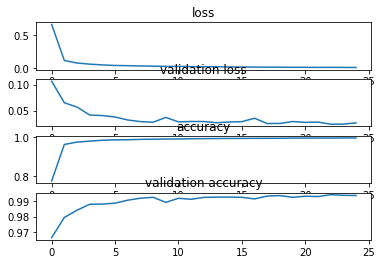

In [128]:
print(y_train.shape)
history = model.fit(x_train_m, y_train_m, epochs = 25, verbose = 2, batch_size = 100, validation_split = 0.25)

plt.subplot(411)
plt.title("loss")
plt.plot(history.history["loss"])

plt.subplot(412)
plt.title("validation loss")
plt.plot(history.history["val_loss"])

plt.subplot(413)
plt.title("accuracy")
plt.plot(history.history["acc"])

plt.subplot(414)
plt.title("validation accuracy")
plt.plot(history.history["val_acc"])

plt.show()

In [129]:
prediction = model.predict_classes(test_imgs)


In [130]:
#storing the prediceted labels in the kaggle accepted format

no = np.arange(1, 28001,1)
no = no.tolist()
prediction = prediction.tolist()

pred = list(zip(no, prediction))
df = pd.DataFrame(pred,columns = ["ImageId", "Label"])
# print(df)
df.to_csv("result.csv", encoding = "utf-8", index = False)
print("done")

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
5            6      7
6            7      0
7            8      3
8            9      0
9           10      3
10          11      5
11          12      7
12          13      4
13          14      0
14          15      4
15          16      3
16          17      3
17          18      1
18          19      9
19          20      0
20          21      9
21          22      1
22          23      1
23          24      5
24          25      7
25          26      4
26          27      2
27          28      7
28          29      4
29          30      7
...        ...    ...
27970    27971      5
27971    27972      0
27972    27973      4
27973    27974      8
27974    27975      0
27975    27976      3
27976    27977      6
27977    27978      0
27978    27979      1
27979    27980      9
27980    27981      3
27981    27982      1
27982    27983      1
27983    2